## Brent Oil Prices Forecast

- Context
  - The crude oil price movements are subject to diverse influencing factors. This dataset was retrieved from the   U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel)

- Content
  - The aim of this dataset and work is to predict future Crude Oil Prices based on the historical data available in the dataset.
  - The data contains daily Brent oil prices from 17th of May 1987 until the 30th of September 2019.

- Acknowledgements
  - Dataset is available on U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel) which is updated on weekly bases.



In [225]:
print(format("Brent Oil Prices Forecast","*^82"))

****************************Brent Oil Prices Forecast*****************************


In [187]:
# Forecast Brent Oil PriceContext
# import all neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


# for warning message

import warnings
warnings.filterwarnings("ignore")


# import user built functions

import oilpriceFunctions
%load_ext autoreload
%autoreload 2

#iterpool

import itertools

# graph acf and pacf 

import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# import data 

df_original = pd.read_csv("data/BrentOilPrices.csv")

In [89]:
# copy from original dataset

df = df_original.copy()
print(df.shape)
df.head()

(8216, 2)


,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [90]:
# info about data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null object
Price    8216 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [91]:
# change object dtatype to date object

df['Date'] = pd.to_datetime(df.Date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null datetime64[ns]
Price    8216 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.5 KB


In [92]:
# reset index as Date 

df.set_index('Date',inplace = True)

df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


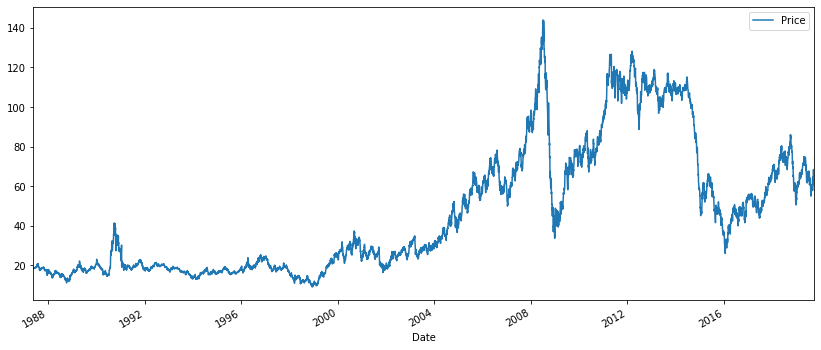

In [95]:
# plot data set

df.plot(figsize = (14,6))

In [208]:
# Taking resample monthly with sum
df_resample = df.resample('SM').sum()
df_resample.head()

,Price,first_diff,forecast
Date,,,
1987-05-15,130.01,-0.05,0.0
1987-05-31,187.28,0.20,0.0
1987-06-15,189.71,0.37,0.0
1987-06-30,214.22,0.73,0.0
1987-07-15,241.53,0.32,0.0


In [213]:
# checking rolling function on data frame 

df.rolling(window=12).std()


,Price,first_diff,forecast
Date,,,
1987-05-21,NaN,NaN,NaN
1987-05-22,NaN,NaN,NaN
1987-05-25,NaN,NaN,NaN
1987-05-26,NaN,NaN,NaN
1987-05-27,NaN,NaN,NaN
...,...,...,...
2019-09-24,1.982202,2.660749,2.202468
2019-09-25,2.047958,2.592972,2.028520
2019-09-26,2.112893,2.580594,2.098513


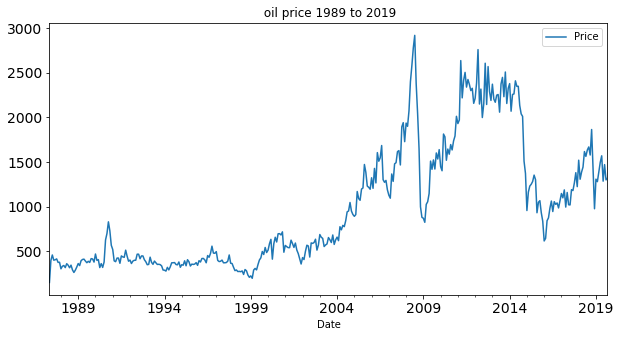

In [97]:
#plot resample time series data 
df_resample.plot(figsize = (10,5) , title = " oil price 1989 to 2019" ,fontsize = 14)

<Figure size 432x288 with 0 Axes>

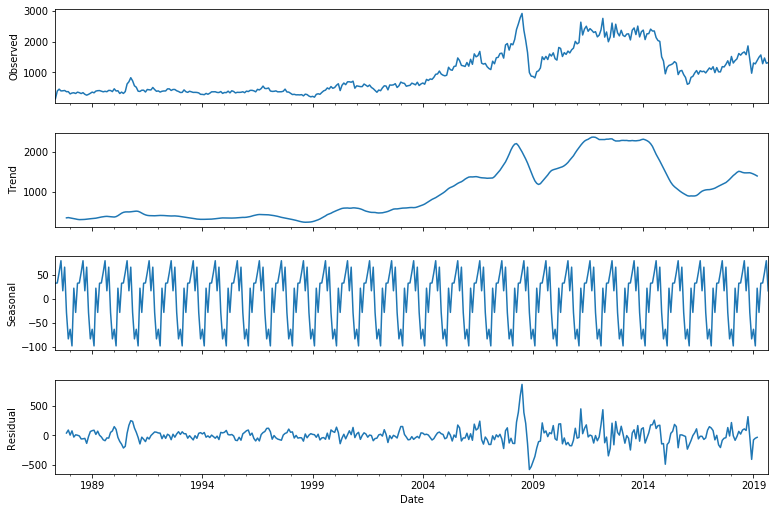

In [98]:
# Decompose to find trend,seasonality,redsidual and observed 

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_resample,freq=12)
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)

In [43]:
# checking resample with Quater and sum method
df.resample('Q').sum()

,Price
Date,
1987-06-30,544.71
1987-09-30,1258.16
1987-12-31,1161.26
1988-03-31,970.63
1988-06-30,1016.18
...,...
2018-09-30,4879.56
2018-12-31,4263.36
2019-03-31,3975.13


Statistic Test :  -6.275972280554575
p-value :  3.899923089813694e-08
# n_lags :  12
No of observation:  375
 critical value 1% : -3.447909006729481
 critical value 5% : -2.8692783343881483
 critical value 10% : -2.5708923751111112


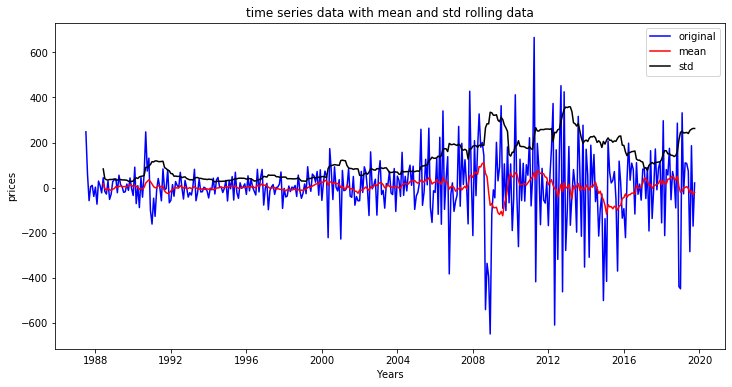

In [101]:
# first difference

df_resample['first_diffprice'] = df_resample['Price'].diff()
df_resample.dropna(inplace =True)
oilpriceFunctions.adfuller_test(df_resample['first_diffprice'],12)

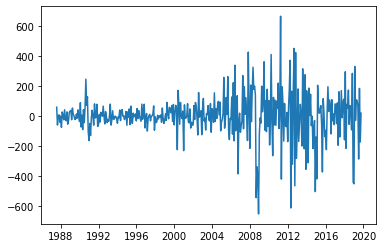

In [103]:
# check non-stationary time series data by ploting

plt.plot(df_resample['first_diffprice'],)

## Result
- Above from two adfuller test and plot, There are statistic test is less than critical value and p-values less than significant value(0.05). So time series datas are non-stationary. 

Statistic Test :  -8.040199085849986
p-value :  1.85588161256036e-12
# n_lags :  17
No of observation:  368
 critical value 1% : -3.4482453822848496
 critical value 5% : -2.8694261442901396
 critical value 10% : -2.5709711770439507


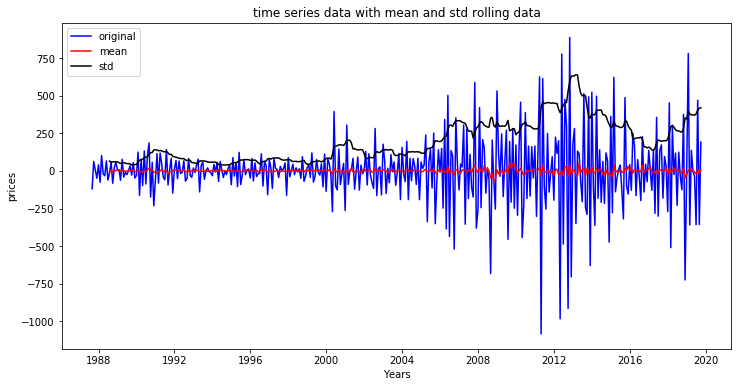

In [115]:
# second difference for becoming non-stationary time series data 

df_resample['second_diff'] = df_resample['first_diffprice'].diff()
df_resample.dropna(inplace = True)
oilpriceFunctions.adfuller_test(df_resample['second_diff'],12)

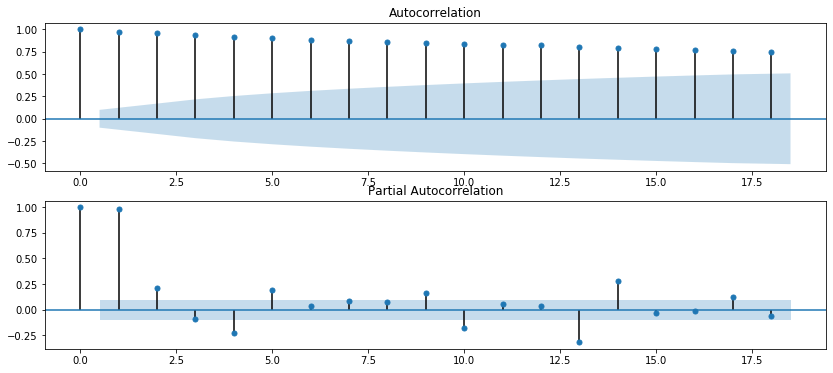

In [111]:
#plot price time series data acf and pacf 

fig ,ax = plt.subplots(nrows=2,ncols=1,figsize = (14,6))

#for acf
fig = sm.graphics.tsa.plot_acf(df_resample.Price,lags =18,ax = ax[0])

# for pacf

fig = sm.graphics.tsa.plot_pacf(df_resample.Price,lags =18,ax = ax[1])

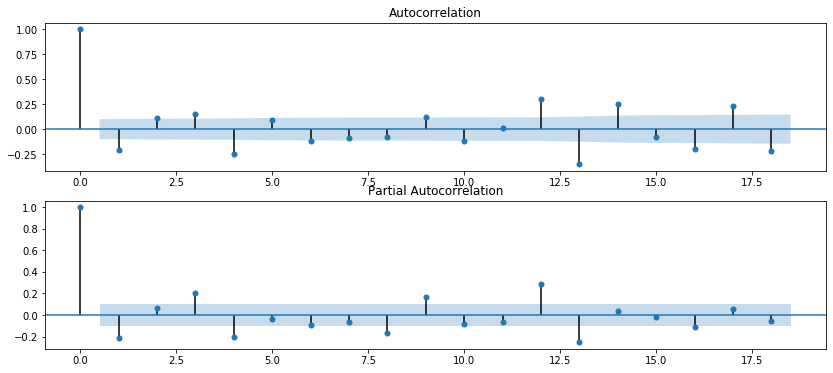

In [112]:
#plot first differentiate price time series data acf and pacf 

fig ,ax = plt.subplots(nrows=2,ncols=1,figsize = (14,6))

#for acf
fig = sm.graphics.tsa.plot_acf(df_resample.first_diffprice,lags =18,ax = ax[0])

# for pacf

fig = sm.graphics.tsa.plot_pacf(df_resample.first_diffprice,lags =18,ax = ax[1])

In [161]:
# modeling SARIMA for df_resample data 

mod = sm.tsa.statespace.SARIMAX(df_resample.Price,order=(2,1,1),seasonal_order=(2,1,1,12),trend='n')
result =mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  386
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2368.317
Date:                            Tue, 25 Feb 2020   AIC                           4750.635
Time:                                    13:35:05   BIC                           4778.086
Sample:                                08-31-1987   HQIC                          4761.535
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2793      0.306      0.912      0.362      -0.321       0.879
ar.L2          0.1445      0.041      3.564      0.000       0.065       0.224
ma.L1         -0.3765      0.305     -1.235      0.217      -0.974       0.221
ar.S.L12       0.1971      0.047      4.154      0.000       0.104       0.290
ar.S.L24      -0.2087      0.056     -3.759      0.000      -0.317      -0.100
ma.S.L12      -0.8987      0.032    -28.467      0.000      -0.961      -0.837
sigma2      1.813e+04    800.482     22.652      0.000    1.66e+04    1.97e+04
===================================================================================
Ljung-Box (Q):                      158.97   Jarque-Bera (JB):               317.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.38   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 0, 'Years')

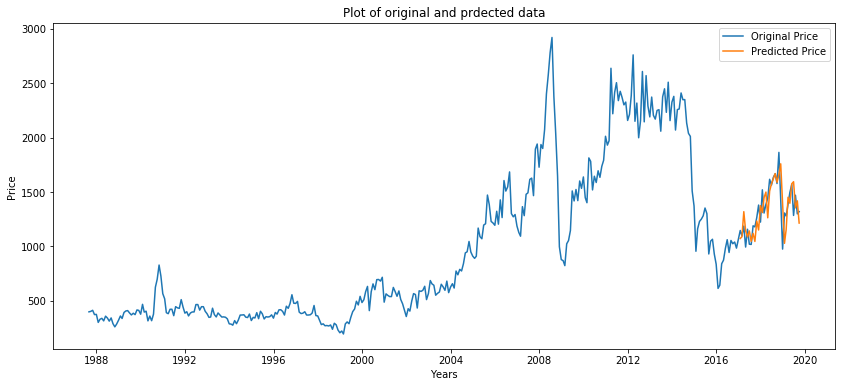

In [162]:
# Predict price
df_resample['forecast'] = result.predict(start = pd.to_datetime('2017-01-31'),dynamic=False)
plt.figure(figsize = (14,6))
plt.plot(df_resample['Price'],label = 'Original Price')
plt.plot(df_resample['forecast'],label = 'Predicted Price')
plt.legend(loc='best')

plt.title("Plot of original and prdected data")
plt.ylabel("Price")
plt.xlabel("Years")

In [163]:
df_resample[df_resample.index.year == 2017]

,Price,first_diffprice,second_diff,forecast
Date,,,,
2017-01-31,1146.11,79.94,-2.08,1072.227947
2017-02-28,1097.39,-48.72,-128.66,1088.570501
2017-03-31,1186.55,89.16,137.88,1319.147685
2017-04-30,993.85,-192.70,-281.86,1143.447992
2017-05-31,1157.51,163.66,356.36,1087.595443
2017-06-30,1020.10,-137.41,-301.07,1142.449369
2017-07-31,1018.05,-2.05,135.36,1046.090564
2017-08-31,1189.20,171.15,173.20,1119.625578
2017-09-30,1179.21,-9.99,-181.14,1045.358962


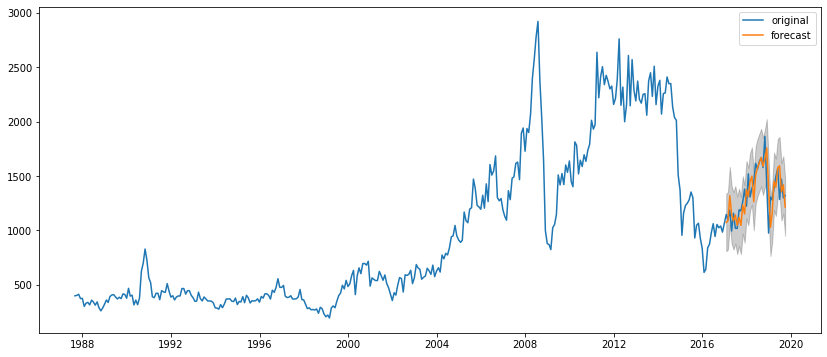

In [175]:
# Prediction 

predict1 = result.get_prediction(start = pd.to_datetime('2017-01-31') )
predict1_ci = predict1.conf_int()
plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(predict1.predicted_mean,label = 'forecast')
plt.legend(loc='best')


plt.fill_between(predict1_ci.index,predict1_ci.iloc[:,0],predict1_ci.iloc[:,1],color = 'k',alpha = .2)
plt.show()



            lower Price  upper Price
2019-10-31  1152.106995  1680.018195
2019-11-30   804.894497  1516.099454
2019-12-31   578.455597  1470.536879
2020-01-31   540.503749  1587.663314
2020-02-29   472.319138  1659.861015
2020-03-31   575.663713  1890.673880
2020-04-30   479.747107  1912.105004
2020-05-31   493.981639  2035.335488
2020-06-30   361.931125  2005.363780
2020-07-31   374.947670  2114.629477
2020-08-31   294.240688  2125.196387
2020-09-30   197.242425  2115.171523
2020-10-31   173.594507  2225.296529
2020-11-30     0.408981  2172.611253
2020-12-31   -71.643545  2220.562471
2021-01-31  -155.468032  2251.666965
2021-02-28  -241.773097  2276.073142
2021-03-31  -122.980871  2501.305448
2021-04-30  -250.664548  2476.153703
2021-05-31  -211.170769  2614.580246
2021-06-30  -251.798400  2669.601731
2021-07-31  -285.464786  2728.583637
2021-08-31  -295.726524  2808.223441
2021-09-30  -430.613167  2760.709611
2021-10-31  -398.118213  2872.577998
2021-11-30  -560.293708  2788.428408
2

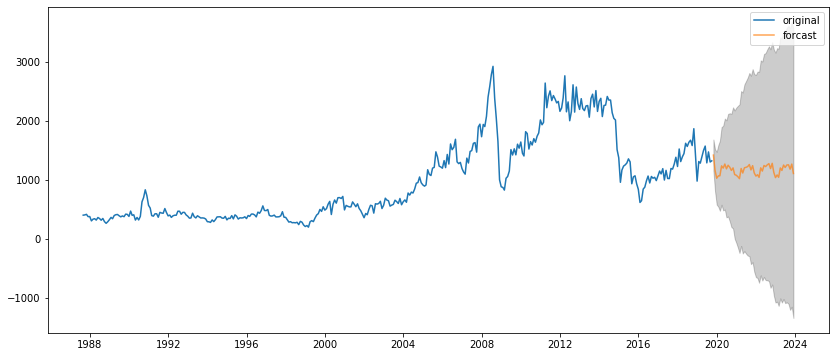

In [186]:
# Forcasting

forcast = result.get_forecast(steps = 50)
forcast_ci = forcast.conf_int()

plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(forcast.predicted_mean,label ='forcast' , alpha = .7)
plt.legend(loc='best')

plt.fill_between(forcast_ci.index,forcast_ci.iloc[:,0],forcast_ci.iloc[:,1],color ='k',alpha = .2)
plt.show

print(forcast_ci)


## optimization and tuning

In [190]:
#optimization

p=d=q=range(1,3)

pdq = list(itertools.product(p,d,q))

pdqs =[ (x[0],x[1],x[2],12) for x in pdq]

print("Print of order of AR difference MR \n")
print(pdq)

print("\nPrint of order of seasonal order \n")
print(pdqs)

Print of order of AR difference MR 

[(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2)]

Print of order of seasonal order 

[(1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [214]:
# execute on list of order

ans = []
for comb in pdq:
    for combs in pdqs:
        mod = sm.tsa.statespace.SARIMAX(df.Price,
                                       order=comb,
                                       seasonal_order=combs,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        output = mod.fit()
        ans.append([comb,combs,output.aic])
        print(f" ARIMA {comb} x {combs} 12 : AIC = {output.aic}")

 ARIMA (1, 1, 1) x (1, 1, 1, 12) 12 : AIC = 24530.04821616088
 ARIMA (1, 1, 1) x (1, 1, 2, 12) 12 : AIC = 24487.13642994316
 ARIMA (1, 1, 1) x (1, 2, 1, 12) 12 : AIC = 27599.14610609439
 ARIMA (1, 1, 1) x (1, 2, 2, 12) 12 : AIC = 24653.616246532823
 ARIMA (1, 1, 1) x (2, 1, 1, 12) 12 : AIC = 24507.4444605158
 ARIMA (1, 1, 1) x (2, 1, 2, 12) 12 : AIC = 24488.98661666263
 ARIMA (1, 1, 1) x (2, 2, 1, 12) 12 : AIC = 26717.69153146232
 ARIMA (1, 1, 1) x (2, 2, 2, 12) 12 : AIC = 24744.217195791723
 ARIMA (1, 1, 2) x (1, 1, 1, 12) 12 : AIC = 24529.619720243536
 ARIMA (1, 1, 2) x (1, 1, 2, 12) 12 : AIC = 24487.01905079107
 ARIMA (1, 1, 2) x (1, 2, 1, 12) 12 : AIC = 27596.282001846488
 ARIMA (1, 1, 2) x (1, 2, 2, 12) 12 : AIC = 24659.003664032112
 ARIMA (1, 1, 2) x (2, 1, 1, 12) 12 : AIC = 24508.989951083277
 ARIMA (1, 1, 2) x (2, 1, 2, 12) 12 : AIC = 24488.280337596887
 ARIMA (1, 1, 2) x (2, 2, 1, 12) 12 : AIC = 26714.499207566834
 ARIMA (1, 1, 2) x (2, 2, 2, 12) 12 : AIC = 24783.995340446665


In [215]:
# make dataframe for find min aic 

df_ans = pd.DataFrame(ans , columns =['pdq','pdqs','aic'])
df_ans.head()

,pdq,pdqs,aic
0,"(1, 1, 1)","(1, 1, 1, 12)",24530.048216
1,"(1, 1, 1)","(1, 1, 2, 12)",24487.136430
2,"(1, 1, 1)","(1, 2, 1, 12)",27599.146106
3,"(1, 1, 1)","(1, 2, 2, 12)",24653.616247
4,"(1, 1, 1)","(2, 1, 1, 12)",24507.444461


In [216]:
# find min aic

df_ans.loc[df_ans.aic.idxmin]

pdq         (2, 1, 2)
pdqs    (1, 1, 2, 12)
aic           24486.6
Name: 41, dtype: object

In [218]:
# model fit for daily price 

output_d = sm.tsa.statespace.SARIMAX(df.Price,
                                       order=(2,1,2),
                                       seasonal_order=(1,1,2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)


result_d = output_d.fit()
result_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 8215
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood              -12235.313
Date:                            Wed, 04 Mar 2020   AIC                          24486.627
Time:                                    15:23:49   BIC                          24542.697
Sample:                                         0   HQIC                         24505.798
                                           - 8215                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3501      0.025    -14.286      0.000      -0.398      -0.302
ar.L2         -0.9129      0.022    -42.127      0.000      -0.955      -0.870
ma.L1          0.3709      0.025     14.994      0.000       0.322       0.419
ma.L2          0.9151      0.022     42.549      0.000       0.873       0.957
ar.S.L12      -0.9048      0.032    -28.297      0.000      -0.967      -0.842
ma.S.L12      -0.1172      0.036     -3.300      0.001      -0.187      -0.048
ma.S.L24      -0.8814      0.036    -24.808      0.000      -0.951      -0.812
sigma2         1.1610      0.010    121.478      0.000       1.142       1.180
===================================================================================
Ljung-Box (Q):                      102.19   Jarque-Bera (JB):             23675.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.88   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

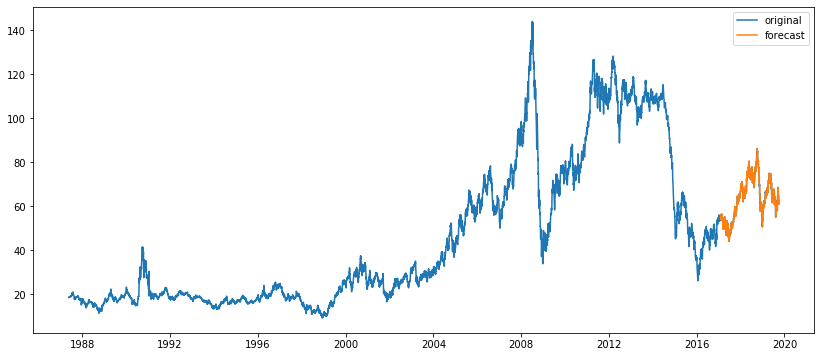

In [220]:
# Prediction with optimized orders for daily data 

predict_d = result_d.get_prediction(start = pd.to_datetime('2017-01-31') )
predict_d_ci = predict_d.conf_int()
plt.figure(figsize = (14,6))
plt.plot(df.Price,label = 'original')
plt.plot(predict_d.predicted_mean,label = 'forecast')
plt.legend(loc='best')

In [196]:
# model fit with optimized order and seasonal order for monthly data 

output_opt = sm.tsa.statespace.SARIMAX(df_resample.Price,
                                       order=(1,1,2),
                                       seasonal_order=(2,2,2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
result_opt =output_opt.fit()
result_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  386
Model:             SARIMAX(1, 1, 2)x(2, 2, 2, 12)   Log Likelihood               -2159.074
Date:                            Wed, 04 Mar 2020   AIC                           4334.148
Time:                                    12:00:38   BIC                           4364.637
Sample:                                08-31-1987   HQIC                          4346.304
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3082      0.247      1.247      0.212      -0.176       0.793
ma.L1         -0.4468      0.245     -1.826      0.068      -0.927       0.033
ma.L2          0.1923      0.043      4.519      0.000       0.109       0.276
ar.S.L12       0.1855      0.077      2.399      0.016       0.034       0.337
ar.S.L24      -0.1391      0.062     -2.254      0.024      -0.260      -0.018
ma.S.L12      -1.8697      0.084    -22.156      0.000      -2.035      -1.704
ma.S.L24       0.8817      0.072     12.272      0.000       0.741       1.023
sigma2       2.05e+04   2217.630      9.242      0.000    1.61e+04    2.48e+04
===================================================================================
Ljung-Box (Q):                      152.33   Jarque-Bera (JB):               177.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.70   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

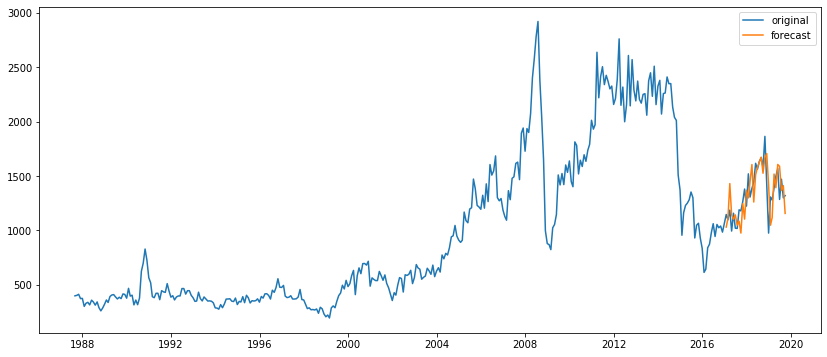

In [197]:
# Prediction with optimized orders

predict_opt = result_opt.get_prediction(start = pd.to_datetime('2017-01-31') )
predict_opt_ci = predict_opt.conf_int()
plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(predict_opt.predicted_mean,label = 'forecast')
plt.legend(loc='best')

<function matplotlib.pyplot.show(*args, **kw)>

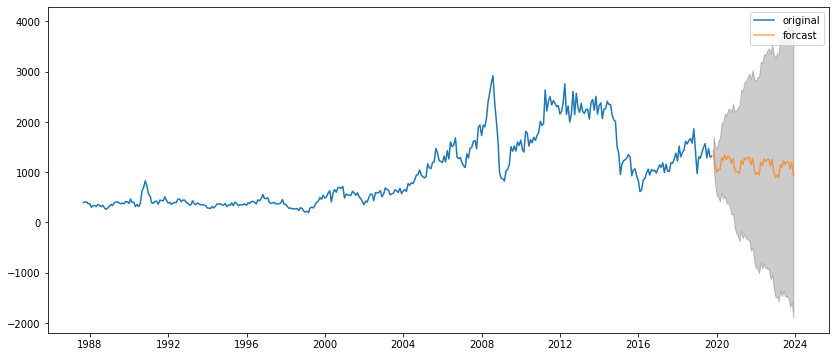

In [200]:
# Forcasting

forcast_opt = result_opt.get_forecast(steps = 50)
forcast_opt_ci = forcast_opt.conf_int()

plt.figure(figsize = (14,6))
plt.plot(df_resample.Price,label = 'original')
plt.plot(forcast_opt.predicted_mean,label ='forcast' , alpha = .7)
plt.legend(loc='best')

plt.fill_between(forcast_opt_ci.index,forcast_opt_ci.iloc[:,0],forcast_opt_ci.iloc[:,1],color ='k',alpha = .2)
plt.show